In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [37]:
# Параметры расчета
T_ = 1 # Время
TAU = 0.01 # Шаг по времени
L = 1 # Длина
H = 0.01 # Шаг по длине
SIGMA = 0.7 # Вес
A_ = 1 # Температуропроводность
X = np.arange(0, L + H, H)
T = np.arange(0, T_ + TAU, TAU)
# Инициализация поля температур
U = np.zeros(len(X))

In [24]:
def init_cond(x): # Начальные условия
    return 3 / 2 * np.log(1 + x**2)

In [5]:
def left_bord_cond(t): # Левое граничное условие
    return 1, -1, 3/ 2 * np.log(1 + t) # alpha_0, beta_0, gamma_0

In [6]:
def right_bord_cond(t): # Правое граничное условие
    return 0, 1, 3 / (2 + t) # alpha_l, beta_l, gamma_l

In [7]:
def het_get(x, t): # Неоднородность
    return 3 * (3 * x**2 - t - 1) / (2 * (1 + t + x**2)**2)

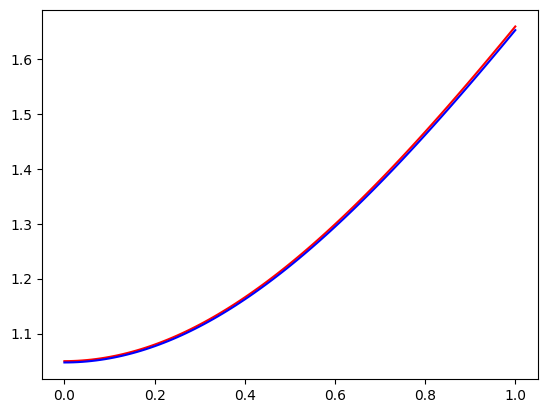

In [39]:
# Заполняем согласно начальным условиям
for i, x in enumerate(X):
    U[i] = init_cond(x)
for n, t in enumerate(T):
    # Сохраняем значения на предыдущем шаге
    U_prev = U
    # Заполняем согласно граничные условия 
    d = np.zeros(len(X))
    alpha_0, beta_0, d[0] = left_bord_cond(t)
    alpha_l, beta_l, d[-1] = right_bord_cond(t)

    A_0 = alpha_0 - beta_0 / H
    B_0 = beta_0 / H
    A_l = alpha_l - beta_l / H
    B_l = beta_l / H
    A = C = - A_ * SIGMA / pow(H, 2)
    B = 2 * A_ * SIGMA / pow(H, 2) + 1 / TAU
    del alpha_0, beta_0, alpha_l, beta_l

    a = np.zeros(len(X)-1)
    b = np.zeros(len(X)-1)
    a[0] = - B_0 / A_0
    b[0] = d[0] / A_0 
    for i in range(1, len(X)-1): # Прямой прогон
        d[i] = A_ * (1 - SIGMA) / pow(H, 2) * \
                    (U_prev[i+1] - 2 * U_prev[i] + U_prev[i-1]) + \
                                    U_prev[i] / TAU + het_get(X[i], t)
        a[i] = - C / (A * a[i-1] + B)
        b[i] = (d[i] - A * b[i-1]) / (A * a[i-1] + B)
    U[-1] = (d[-1] - A_l * b[-1]) / (a[-1] * A_l + B_l)

    for i in range(len(X)-1, 0, -1): # Обратный прогон
        U[i-1] = a[i-1] * U[i] + b[i-1]
    
U_0 = np.zeros(len(X))
for i, x in enumerate(X):
    U_0[i] = 3 / 2 * np.log(1 + T[-1] + TAU + x**2)

plt.plot(X, U, color='r')
plt.plot(X, U_0, color='b')
plt.show()